In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
import numpy as np
np.random.seed(0)

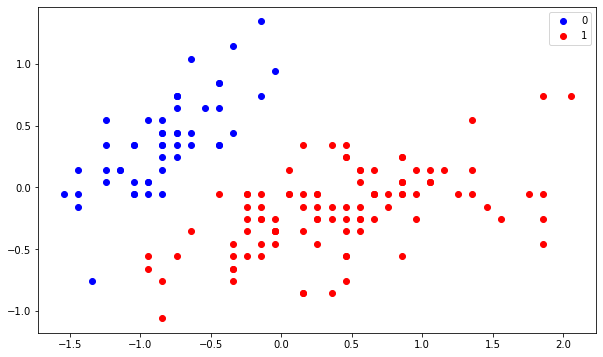

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
X -= X.mean(axis=0)
y = (iris.target != 0) * 1
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
data = np.concatenate([y.reshape((len(y), 1)),X], axis=1)
# Import from datasets folder
np.savetxt('artificial.csv', data, delimiter=',')

N = X.shape[0]
D = X.shape[1]

In [6]:
points = sc.textFile("file:///home/.../artificial.csv")

In [7]:
points.take(10)

['0.000000000000000000e+00,-7.433333333333349557e-01,4.426666666666658756e-01',
 '0.000000000000000000e+00,-9.433333333333342452e-01,-5.733333333333412440e-02',
 '0.000000000000000000e+00,-1.143333333333334423e+00,1.426666666666660532e-01',
 '0.000000000000000000e+00,-1.243333333333334956e+00,4.266666666666596441e-02',
 '0.000000000000000000e+00,-8.433333333333346005e-01,5.426666666666659644e-01',
 '0.000000000000000000e+00,-4.433333333333342452e-01,8.426666666666657868e-01',
 '0.000000000000000000e+00,-1.243333333333334956e+00,3.426666666666657868e-01',
 '0.000000000000000000e+00,-8.433333333333346005e-01,3.426666666666657868e-01',
 '0.000000000000000000e+00,-1.443333333333334245e+00,-1.573333333333342132e-01',
 '0.000000000000000000e+00,-9.433333333333342452e-01,4.266666666666596441e-02']

In [8]:
print("Number of partitions: {}".format(points.getNumPartitions()))

Number of partitions: 2


In [9]:
def read_points_batch(points):

    points = list(points)
    arr = np.zeros((len(points), D + 1))
    
    for i, s in enumerate(points):
        arr[i] = np.fromstring(s, dtype=np.float32, sep=',')
    return [arr]

points = points.mapPartitions(read_points_batch)

In [10]:
points.cache()

PythonRDD[3] at RDD at PythonRDD.scala:53

In [11]:
import numpy

class LogisticRegressionSpark:
    
    def __init__(self, iter=100, lr=1.0, verbose=0):
        
        self.iter = iter
        self.lr = lr
        self.verbose = verbose
    
    def fit(self, points, n, d):
 
        self._w = 2 * np.random.ranf(size=d) - 1
        
        for i in range(self.iter):
            
            if self.verbose > 0:
                print("Iteration %i" % (i + 1))
            
            grad = points.map(lambda m: self._gradient(m, self._w))
            grad = grad.reduce(self._add)
            
            self._w -= self.lr * (1.0 / n) * grad
            
        if self.verbose > 0:
            print("Final weights: {}".format(str(self._w)))
    
    def predict_proba(self, Xsmall):
        s = np.dot(Xsmall, self._w)
        return 1.0 / (1.0 + np.exp(-s))
    
    
    def _gradient(self, matrix, weights):
        w = weights.reshape((-1,1))
        y = matrix[:, 0].reshape((-1,1))    
        X = matrix[:, 1:]  

        yXt = numpy.multiply(y, X)
        s = np.exp(numpy.multiply(y, numpy.dot(X, w)))
        grad = numpy.multiply(- 1.0 / (1.0 + s), yXt)
        grad = grad.sum(0)
        

        return grad

    def _add(self, x, y):

        return x + y

In [ ]:
model = LogisticRegressionSpark(iter=100, lr=1.0, verbose=1)
model.fit(points, N, D)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_proba(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');